# Project Description

### Summary
>As an employee of a video game online store called Ice, we'll be looking into historical game sales data to identify patterns where games are designated as successful or not. We'll be forecasting potential big 'winners' and plan an advertising campaign for 2017 (the upcoming year).

### Data
>The dataset contains video game data across all platforms, genres and includes sales data through the 3 major video game continents (NA,EU,JP). This also includes user and expert reviews along with game ratings (ESRB) which is leveraged to assign age ratings.

### Expected Outcome
>At a high level, expecting the data to have quite a few missing items since the horizon spans from early 1980s up until 2016. Once clean-up is complete, we'll start honing in on the top platforms and their respective popular games which will inform us on how to strategically plan for the upcoming ad. campaign. 


***
# Data Preparation
***

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pyplot import show, plot
import seaborn as sns
import plotly.express as px
from scipy import stats as st

In [2]:
# Reading the data

df = pd.read_csv("/Users/dani/Data Science/TripleTen Projects/Project Data/Integrated Project 1/moved_games.csv")
    
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
# Data pre-processing

df.info()
print()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
df.shape

(16715, 11)

In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

**`Initial review`**

Columns

-renaming: Year_of_Release to Release_year

-formatting: everything to lowercase

Data types

-conversion: release_year to int

-conversion: critic_score to int

-conversion (with a caveat): user_score to float (mindful of tbd)

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

Name               11559
Platform              31
Year_of_Release       37
Genre                 12
NA_sales             402
EU_sales             307
JP_sales             244
Other_sales          155
Critic_Score          82
User_Score            96
Rating                 8
dtype: int64

In [8]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [9]:
# function to classify features
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype in ['object', 'bool', 'category']: 
            if df[column].nunique() < 15:
                categorical_features.append(column)
            else: 
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else: 
                continuous_features.append(column)
    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [10]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [11]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['Genre', 'Rating']
Non-Categorical Features: ['Name', 'Platform', 'User_Score']
Discrete Features: []
Continuous Features: ['Year_of_Release', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score']


In [12]:
for i in categorical:
    #print(i, ':')
    print(df[i].value_counts())
    print()

Genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64

Rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64



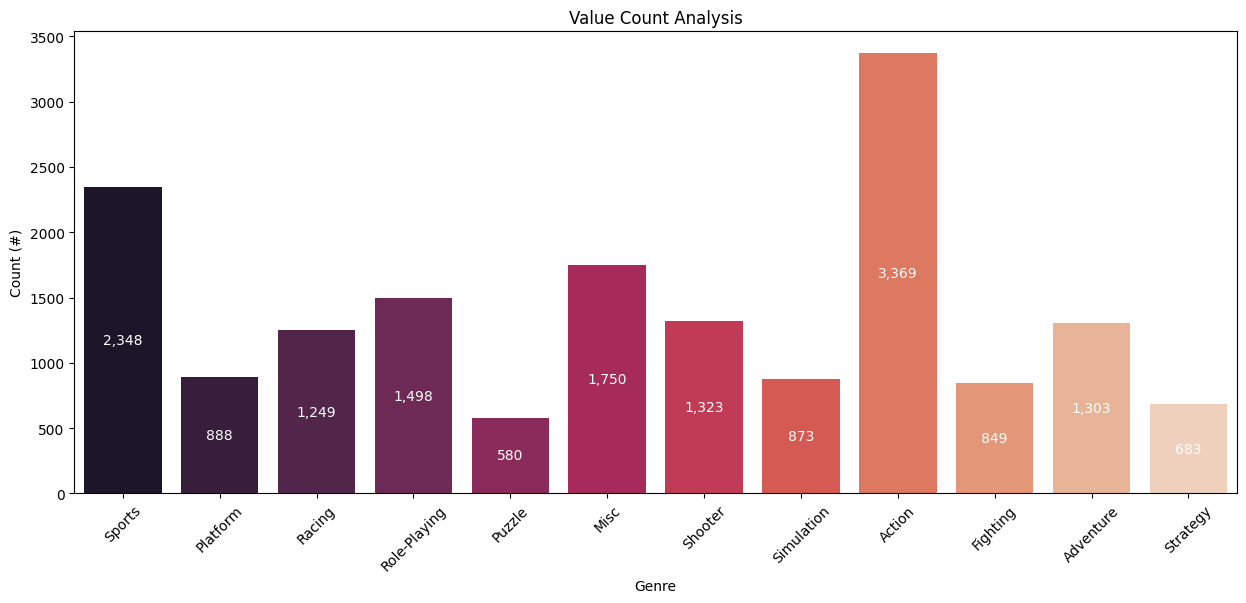

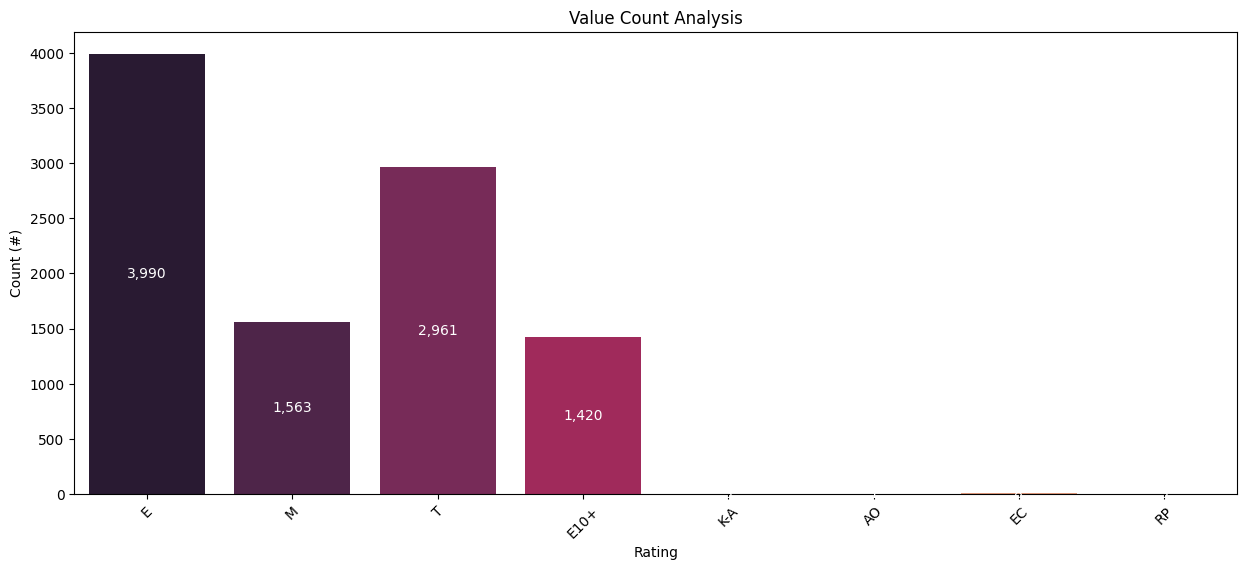

In [13]:
for i in categorical:
    fig, ax = plt.subplots(figsize=(15, 6))
    g = sns.countplot(x=i, data=df, palette='rocket', hue=i, ax=ax, legend=None)
    plt.xticks(rotation = 45)
    for c in ax.containers:
        labels = [f'{round((v.get_height())):,}' for v in c]
        ax.bar_label(c, labels=labels, label_type='center', color='white')
    g.set_title('Value Count Analysis')
    g.set_ylabel('Count (#)')
    plt.show()

In [14]:
for i in non_categorical:
    #print(i, ':')
    print(df[i].value_counts())
    print()

Name
Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: count, Length: 11559, dtype: int64

Platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
W

In [15]:
df_miss = (df.isnull().sum() / len(df)) * 100
df_miss = df_miss.drop(df_miss[df_miss == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_miss})
missing_data.head(10)

,Missing Ratio
Critic_Score,51.319174
Rating,40.478612
User_Score,40.089740
Year_of_Release,1.609333
Name,0.011965
Genre,0.011965


/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:2745: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
/var/folders/wc/6x35sr293njgq8g1xgc9fzlm0000gn/T/ipykernel_5723/3188417329.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#9999CC'` for the same effect.

  g = sns.catplot(data=missing_data,


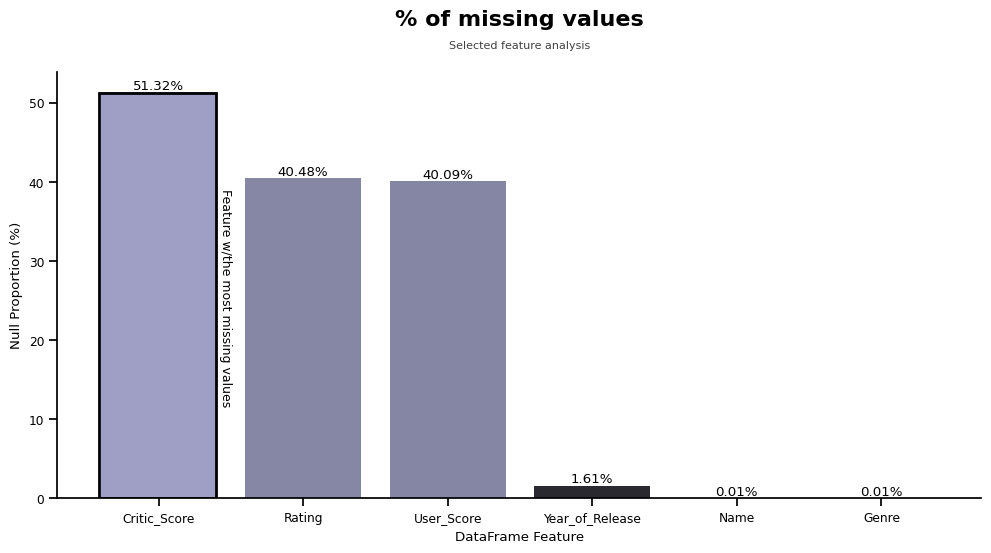

In [16]:
sns.set_context("notebook", font_scale=.8)

fig, ax = plt.subplots(figsize=(10, 8))
plt.close()
g = sns.catplot(data=missing_data,
            x=missing_data.index,
            y='Missing Ratio',
            kind='bar',
            hue='Missing Ratio',
            height=5,
            aspect=2,
            legend=None,
            color= '#9999CC',
            #palette='#9999CC',
            ax=ax
            )

ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', color='black')

g.set(xlabel='DataFrame Feature', ylabel='Null Proportion (%)')

ax.autoscale()
ax.text(x=0.5, y=1.1, s='% of missing values', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Selected feature analysis', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

from matplotlib.patches import Rectangle

ax.add_patch(Rectangle((-.41, 0), .81, 51.25, fill=False, edgecolor='black', lw=2))
ax.text(0.42, 12, "Feature w/the most missing values", fontsize = 9, color = "black", rotation = -90)
# ax.text(-.55, 21)
plt.show()

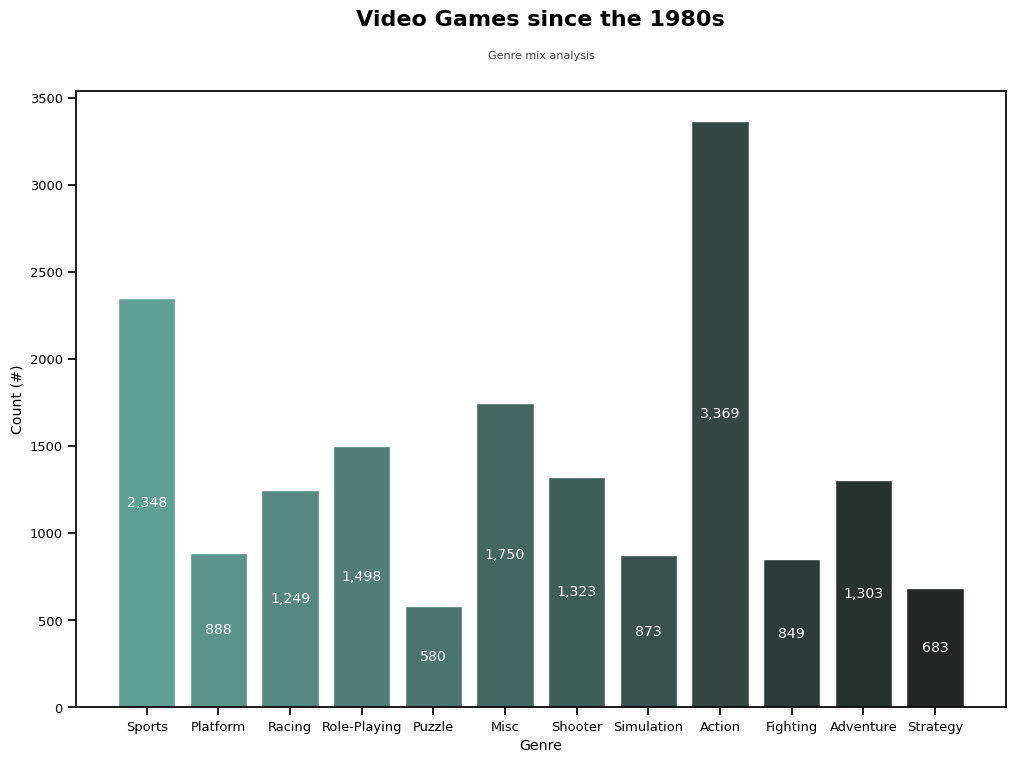

In [17]:
sns.set_context("notebook", font_scale=.85)

fig, ax = plt.subplots(figsize=(12, 8))
g = sns.countplot(data=df,
                  x='Genre',
                  hue='Genre',
                  color= '#d0bbff',
                  palette="dark:#5A9_r",
                  ax=ax,
                  dodge=False,
                  edgecolor = "white",
                  legend=False
                  )

ax.set(xlabel="Genre", ylabel='Count (#)')
bottoms = {}
for bars in ax.containers:
    for bar in bars:
        x, y = bar.get_xy()
        h = bar.get_height()
        if x in bottoms:
            bar.set_y(bottoms[x])
            bottoms[x] += h
        else:
            bottoms[x] = h

for c in ax.containers:
    labels = [f'{round((v.get_height())):,}' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', color='white')

ax.relim()  # the plot limits need to be updated with the moved bars
ax.autoscale()
ax.text(x=0.5, y=1.1, s='Video Games since the 1980s', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Genre mix analysis', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
# sns.despine(offset=10, trim=True)

# if we need to move legend around
# h,l = ax.get_legend_handles_labels()
# ax.legend(h[:4],l[:4], bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

In [18]:
# Data pre-processing (cont.)

# Column revisisions
ice_df = df.rename(columns={"Year_of_Release": "release_year"}) #amending the column names for some consistency, saving into another DF
ice_df.columns= ice_df.columns.str.lower() #amending columns to lowercase

# Fills and Dtype conversions
ice_df['release_year'] = pd.to_numeric(ice_df['release_year'], errors='coerce').astype('Int64') #converting to an int type
ice_df['critic_score'] = pd.to_numeric(ice_df['critic_score'], errors='coerce')
ice_df['user_score'] = pd.to_numeric(ice_df['user_score'], errors='coerce')

ice_df['rating'] = ice_df['rating'].fillna('Unknown') #filling in the empty values

ice_df['platform'] = ice_df['platform'].astype('category') #coverting to category type to save memory and make the analysis faster
ice_df['genre'] = ice_df['genre'].astype('category') #coverting to category type to save memory and make the analysis faster

# Row drops by column
ice_df = ice_df.dropna(subset=['release_year','name'])

display(ice_df) #check

ice_df.info() #check

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown


<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   name          16444 non-null  object  
 1   platform      16444 non-null  category
 2   release_year  16444 non-null  Int64   
 3   genre         16444 non-null  category
 4   na_sales      16444 non-null  float64 
 5   eu_sales      16444 non-null  float64 
 6   jp_sales      16444 non-null  float64 
 7   other_sales   16444 non-null  float64 
 8   critic_score  7983 non-null   float64 
 9   user_score    7463 non-null   float64 
 10  rating        16444 non-null  object  
dtypes: Int64(1), category(2), float64(6), object(2)
memory usage: 1.3+ MB


**`Column Review`**

release_year: converted the NaN/blanks into 0s in order to convert the column to int
> - release year should have no decimals

> - missing year data could be due to a combination of 1) overall sales being too low (where a specific sales threshold is established), 2) older platform and 3) critic scores being too low

critic_score: converted the NaN/blanks into 0s in order to convert the column to int
> - critic scores have no decimals, come in as whole numbers

> - missing critic score data could be due to 1) game popularity (contributes to low sales) or 2) missing esrb rating (not popular enough to be given a rating)

user_score: converted the NaN/blanks into 0s in order to convert the column to float
> - critic scores come in as decimals, converting the tbd instances to zeros BUT creating a separate column to house the tbd in case we need to look into those further

> - missing user score data (similar to critic score) could be due to 1) game popularity, 2) missing esrb rating (not popular enough to be given a rating), 3) low sales overall and 4) not enough data collected (due to low sales)


In [19]:
# Data pre-processing (cont.)

ice_df['total_sales_M'] = ice_df['na_sales'] + ice_df['eu_sales'] + ice_df['jp_sales'] + ice_df['other_sales'] #new column housing the sum of all sales columns, adding an M identifier for Million # could use agg or apply here
# other option
## ice_df = ice_df.assign( total_sales_M=lambda x: (x['na_sales'] + x['eu_sales'] + x['jp_sales'] + x['other_sales']) )

display(ice_df.sample(10)) #generating sample checks, especially validating the new user_score_tbd column

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales_M
1040,Call of Duty: Modern Warfare 3,PC,2011,Shooter,0.41,0.98,0.00,0.32,78.0,2.5,M,1.71
4744,Harry Potter and the Deathly Hallows - Part 1,DS,2010,Action,0.19,0.18,0.00,0.04,56.0,6.0,E10+,0.41
7339,Star Wars: Battlefront,PC,2004,Shooter,0.07,0.13,0.00,0.02,72.0,3.5,T,0.22
13182,Hisshou 777 Fighter: Pachi Slot Eiyu Densetsu,SNES,1994,Misc,0.00,0.00,0.05,0.00,NaN,NaN,Unknown,0.05
962,The Sims: Hot Date,PC,2001,Simulation,1.81,0.00,0.00,0.00,85.0,7.9,T,1.81
10678,NHL 2K6,X360,2005,Sports,0.09,0.00,0.00,0.01,75.0,6.1,E10+,0.10
12212,Destrega,PS,1998,Fighting,0.04,0.03,0.00,0.00,NaN,NaN,Unknown,0.07
14279,Gaia Saver Hero Saidai no Sakusen,SNES,1994,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,Unknown,0.03
1110,Mario Party 6,GC,2004,Misc,0.90,0.11,0.60,0.05,71.0,7.9,E,1.66
5745,Panzer Dragoon II Zwei,SAT,1995,Shooter,0.00,0.00,0.31,0.00,NaN,NaN,Unknown,0.31


In [20]:
# Data pre-processing (cont.)

duplicated_df = ice_df[ice_df.duplicated()] #checking for duplicates across all columns before massaging the data further
duplicated_df.info() #check

unique_platform = ice_df['platform'].unique() #looking into unique values in one of the categorical columns

display(unique_platform)

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           0 non-null      object  
 1   platform       0 non-null      category
 2   release_year   0 non-null      Int64   
 3   genre          0 non-null      category
 4   na_sales       0 non-null      float64 
 5   eu_sales       0 non-null      float64 
 6   jp_sales       0 non-null      float64 
 7   other_sales    0 non-null      float64 
 8   critic_score   0 non-null      float64 
 9   user_score     0 non-null      float64 
 10  rating         0 non-null      object  
 11  total_sales_M  0 non-null      float64 
dtypes: Int64(1), category(2), float64(7), object(2)
memory usage: 1.7+ KB


['Wii', 'NES', 'GB', 'DS', 'X360', ..., 'NG', 'TG16', '3DO', 'GG', 'PCFX']
Length: 31
Categories (31, object): ['2600', '3DO', '3DS', 'DC', ..., 'WiiU', 'X360', 'XB', 'XOne']

In [21]:
correlation_filter = ['release_year','critic_score', 'user_score','total_sales_M']

ice_df[correlation_filter].corr()

,release_year,critic_score,user_score,total_sales_M
release_year,1.000000,0.011411,-0.267851,-0.076220
critic_score,0.011411,1.000000,0.579671,0.245349
user_score,-0.267851,0.579671,1.000000,0.087984
total_sales_M,-0.076220,0.245349,0.087984,1.000000


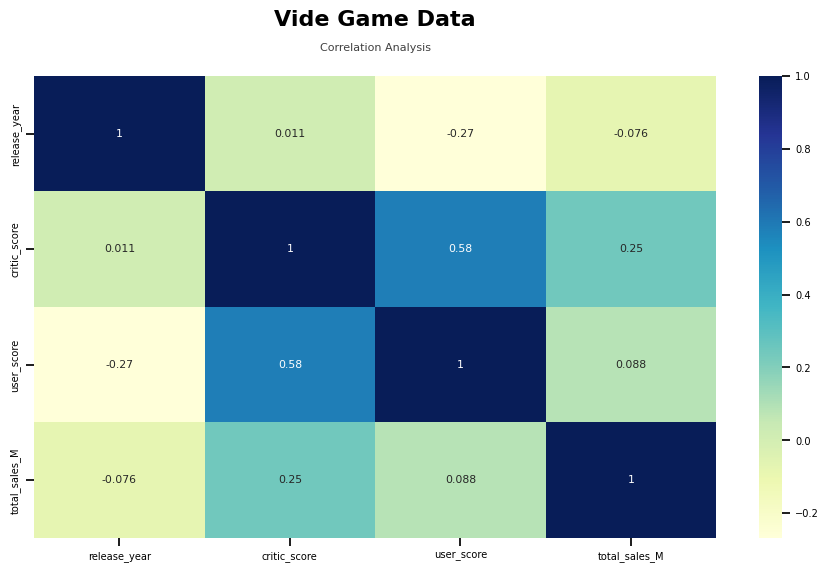

In [41]:
fig, ax = plt.subplots(figsize=(11, 6))
g = sns.heatmap(ice_df[correlation_filter].corr(), cmap='YlGnBu', annot=True, ax=ax)

ax.text(x=0.5, y=1.1, s='Vide Game Data', fontsize=16, weight='bold', ha='center', va='bottom', transform= ax.transAxes)
ax.text(x=0.5, y=1.05, s='Correlation Analysis', fontsize=8, alpha=0.75, ha='center', va='bottom', transform= ax.transAxes)

plt.show()

**`Findings`**

Overall, a few columns and dtypes had to me revised.
> - We reformatted all columns to lowercase
    
> - Converted data types to their required types (along with the category dtype to save on memory given large scope)
    
> > Converted critic and user scores to floats with coercion, this includes the 'tbd' string which we could have saved separately in a Series if we have further need
    
> - Missing values are assumed to be missing due to a multitude of parameters like: 1) low ratings/scores, 2) low overall sales, 3) not enough sales to be turned into actionable reviews, 4) low popularity of genre or platform at a given year which lead to now critic reviews and 5) no easily accessible (at earlier years) gaming websites and/or forums
    
>Total sales column points you towards the popularity of platforms/genres and what was 'in' during said year

***
# Analysis
***

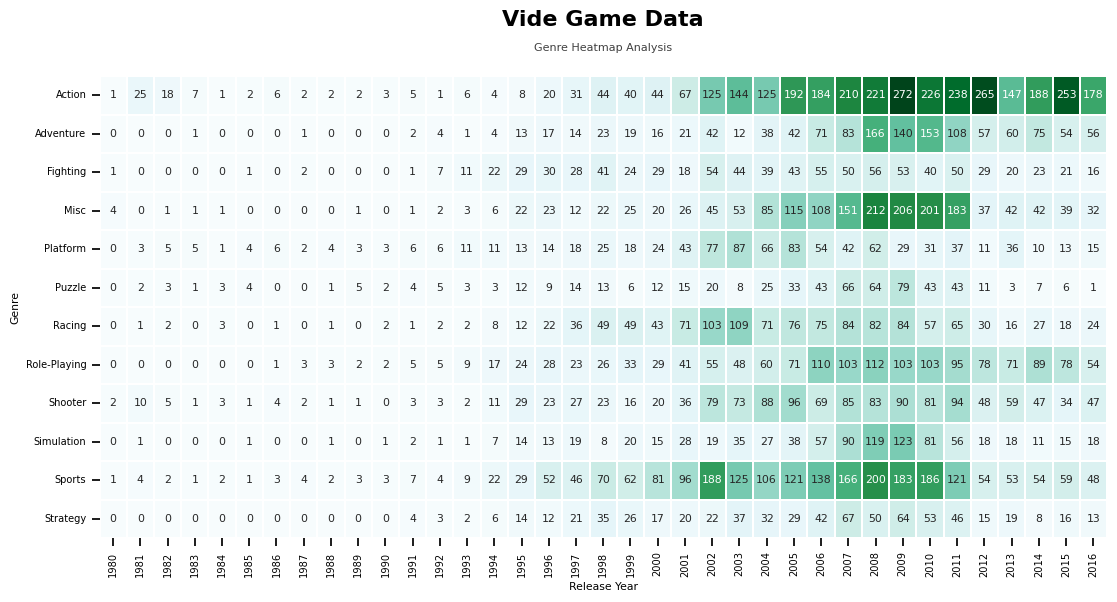

In [40]:
crosstab = pd.crosstab(ice_df['genre'], ice_df['release_year'])
fig, ax = plt.subplots(figsize=(13, 6))
g =sns.heatmap(crosstab, cbar=False, cmap="BuGn", linewidths=0.3, annot=True, fmt='d', ax=ax)

g.set_ylabel('Genre')
g.set_xlabel('Release Year')

ax.text(x=0.5, y=1.1, s='Vide Game Data', fontsize=16, weight='bold', ha='center', va='bottom', transform= ax.transAxes)
ax.text(x=0.5, y=1.05, s='Genre Heatmap Analysis', fontsize=8, alpha=0.75, ha='center', va='bottom', transform= ax.transAxes)

plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

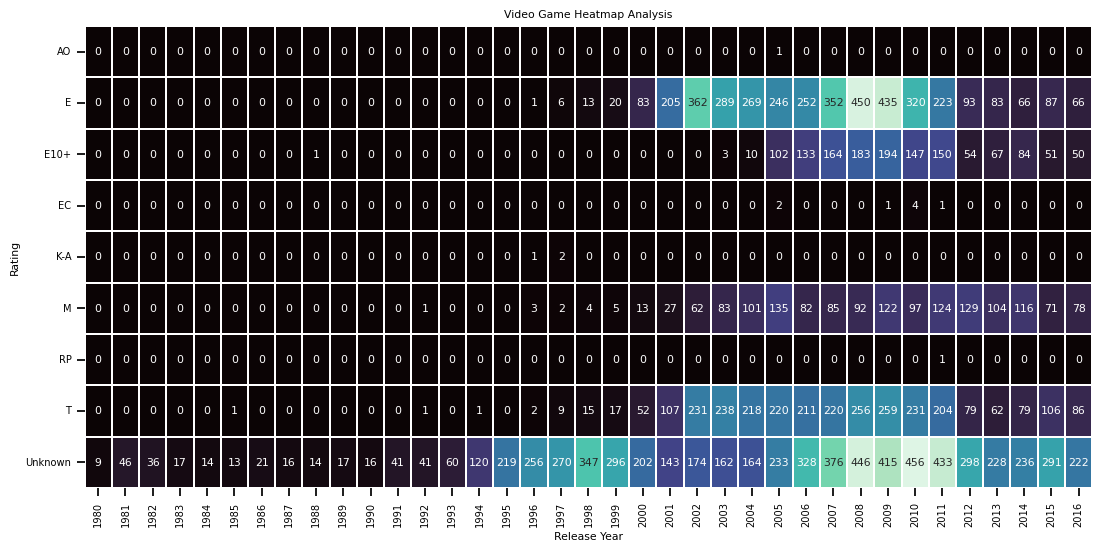

In [25]:
crosstab = pd.crosstab(ice_df['rating'], ice_df['release_year'])
fig, ax = plt.subplots(figsize=(13, 6))
g =sns.heatmap(crosstab, cbar=False, cmap='mako', linewidths=0.3, annot=True, fmt="d", ax=ax)

g.set_ylabel('Rating')
g.set_xlabel('Release Year')

ax.text(x=0.5, y=1.1, s='Vide Game Data', fontsize=16, weight='bold', ha='center', va='bottom', transform= ax.transAxes)
ax.text(x=0.5, y=1.05, s='Rating Heatmap Analysis', fontsize=8, alpha=0.75, ha='center', va='bottom', transform= ax.transAxes)

plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

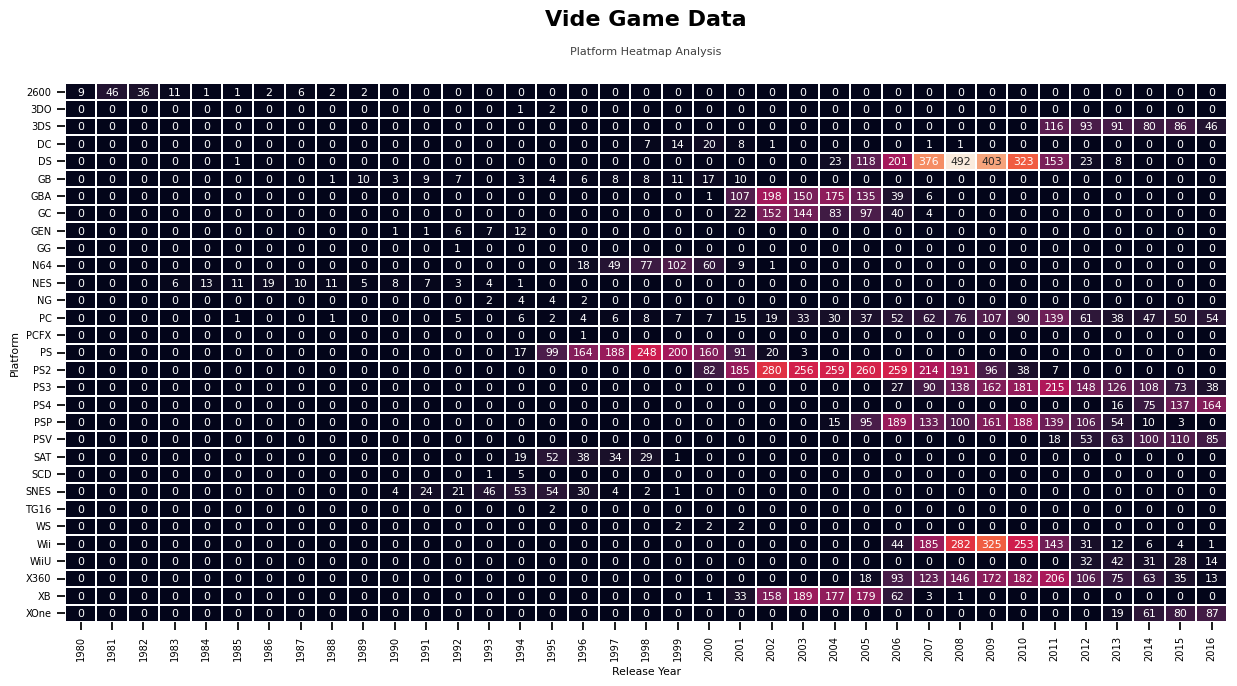

In [39]:
crosstab = pd.crosstab(ice_df['platform'], ice_df['release_year'])
fig, ax = plt.subplots(figsize=(15, 7))
sns.set_context("notebook", font_scale=.65)
g =sns.heatmap(crosstab, cbar=False, cmap="rocket", linewidths=0.3, annot=True, fmt='d', ax=ax)

g.set_ylabel('Platform')
g.set_xlabel('Release Year')

ax.text(x=0.5, y=1.1, s='Vide Game Data', fontsize=16, weight='bold', ha='center', va='bottom', transform= ax.transAxes)
ax.text(x=0.5, y=1.05, s='Platform Heatmap Analysis', fontsize=8, alpha=0.75, ha='center', va='bottom', transform= ax.transAxes)

plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [22]:
# Diving into release_year
# Focus on finding the amount of games released per year, is the data significant?
# Selecting relevant years from 2010 to 2016

game_count = ice_df['release_year'].value_counts().sort_index().reset_index()

all_games = px.bar(game_count, x='release_year', y='count', title='Game Releases by Year<br><sup>(1980-2016)</sup>',
                     labels={'release_year':'Volume', 'index':'Release Year', 'count':'Count (#)'},
                     width=1100, height=600)
all_games.update_layout(yaxis_range=[0,1500])
all_games.update_layout(xaxis={"dtick":1})
all_games.show()

selected_df = ice_df.query("release_year >= 2013")
filtered_period = selected_df['release_year'].value_counts().sort_index().reset_index()

filtered_period_games = px.bar(filtered_period, x='release_year', y='count', title='Game Releases by Year<br><sup>(2013-2016)</sup>',
                     labels={'release_year':'Volume', 'index':'Release Year', 'count':'Count (#)'}, range_x=(2012,2017),
                     width=1100, height=600)
filtered_period_games.update_layout(yaxis_range=[0,1500])
filtered_period_games.show()

game_year_count = ice_df['release_year'].value_counts().sort_index() #looking into the instances for each release year

#display(game_year_count.sort_values(ascending=False)) 

game_platform_count = selected_df['platform'].value_counts().sort_index()
#display(game_platform_count)

#display(game_platform_count.sort_values(ascending=False)) #looking into the instances for each platform year

**`Game Release Findings`**

Total game releases has more than halved since 2010. 
    
> - Top 2 game 'releasers' have been the PS3 and the Xbox360

> - Not far behind, are the handheld consoles: 1) 3DS, 2) DS and 3) PSP
    
> - Newer consoles, like the Xbox One or PS4 have considerably smaller libraries and from the direction of overall game sales by year, these libraries are not expected to hit 2010-2011 levels


In [23]:
# Sales analysis
# How does variability look across platforms?
# Build a distribution to see the overall popularity of platforms and their overall 'tenure'

platform_total_sales = selected_df.groupby('platform')['total_sales_M'].sum() #looking into the instances for each release year
print('Platform Sales sorted by total_sales in millions:')
display(platform_total_sales.sort_values(ascending=False)) # PS2, X360, PS3, Wii, DS (top platform sales to be used in the following analysis)
print()

platform_sales_list = ['na_sales','eu_sales', 'jp_sales', 'other_sales']

platform_sales = selected_df.groupby('platform')[platform_sales_list].sum() #looking into the instances for each release year
print('Platform Sales sorted by na_sales:')
display(platform_sales.sort_values(by='na_sales',ascending=False)) 

Platform Sales sorted by total_sales in millions:


/var/folders/wc/6x35sr293njgq8g1xgc9fzlm0000gn/T/ipykernel_4387/499435707.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
XB        0.00
TG16      0.00
SNES      0.00
SCD       0.00
SAT       0.00
WS        0.00
2600      0.00
PS2       0.00
3DO       0.00
PCFX      0.00
NG        0.00
NES       0.00
N64       0.00
GG        0.00
GEN       0.00
GC        0.00
GBA       0.00
GB        0.00
DC        0.00
PS        0.00
Name: total_sales_M, dtype: float64


Platform Sales sorted by na_sales:


/var/folders/wc/6x35sr293njgq8g1xgc9fzlm0000gn/T/ipykernel_4387/499435707.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
PS4,108.74,141.09,15.96,48.35
XOne,93.12,51.59,0.34,14.27
X360,81.66,42.52,0.51,12.11
PS3,63.50,67.81,23.35,26.77
3DS,38.20,30.96,67.81,6.28
WiiU,29.21,19.85,10.88,4.69
PC,11.11,25.36,0.00,2.96
Wii,6.56,5.93,0.05,1.12
PSV,5.04,6.10,18.59,3.26


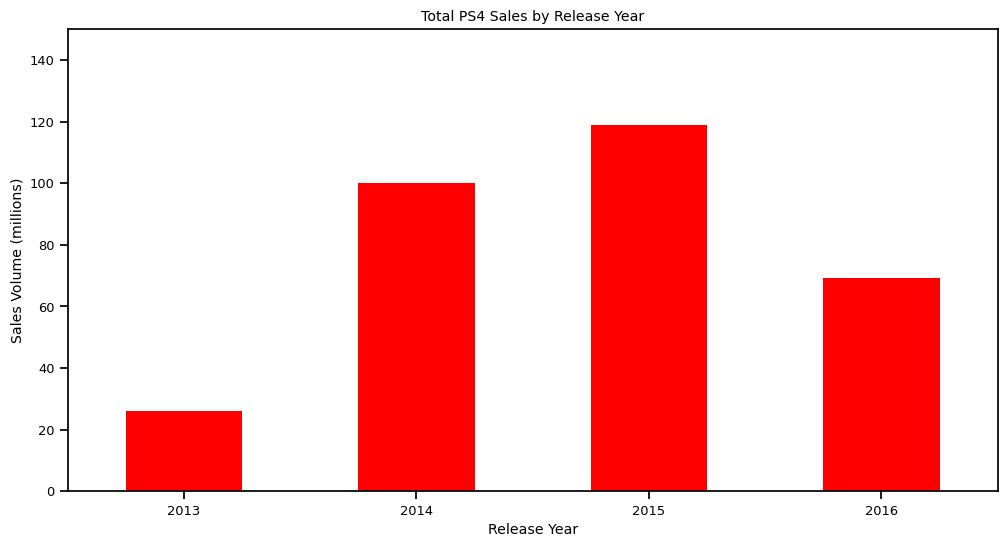

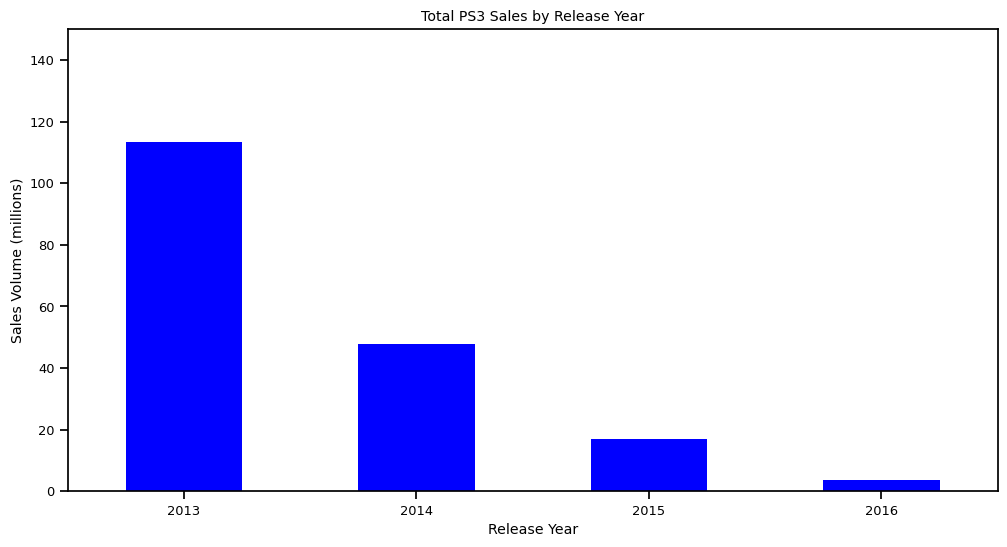

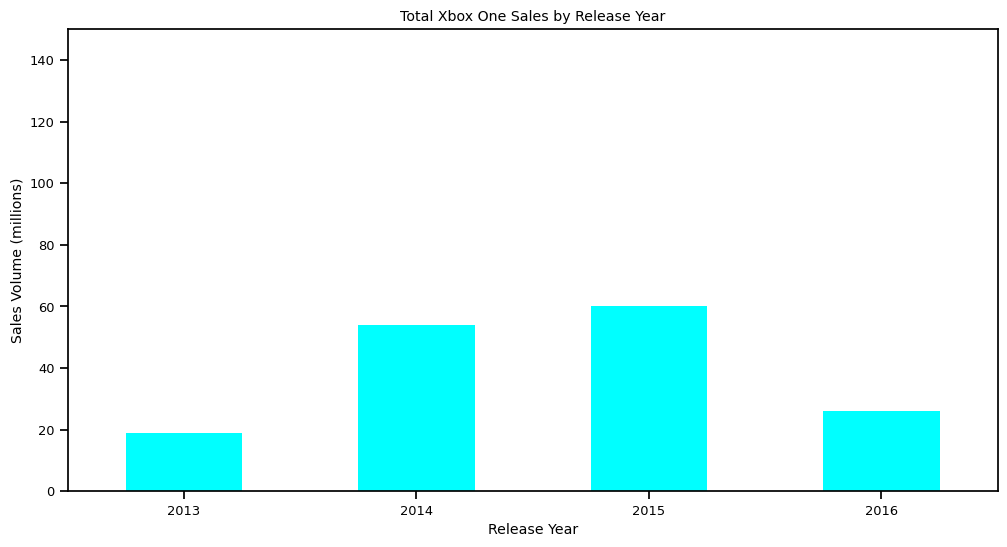

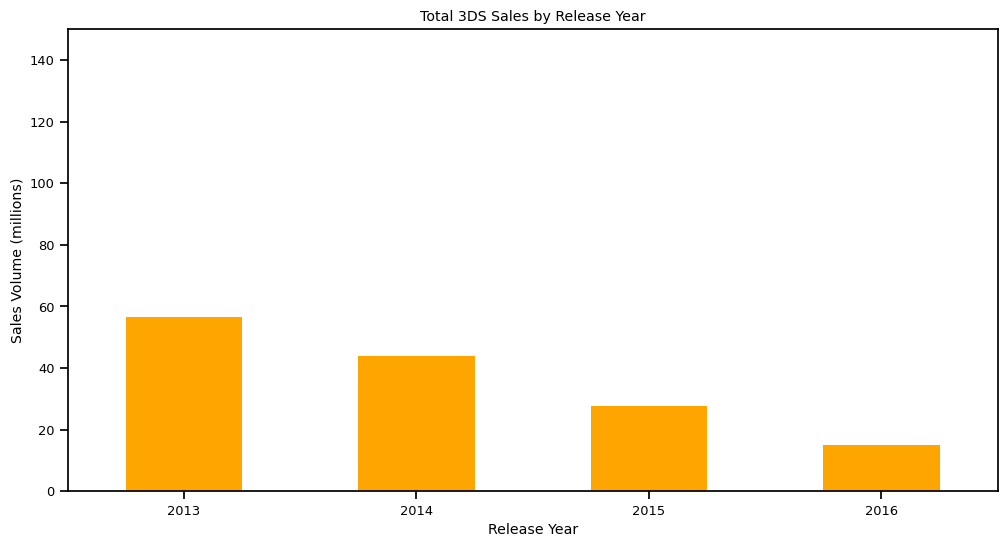

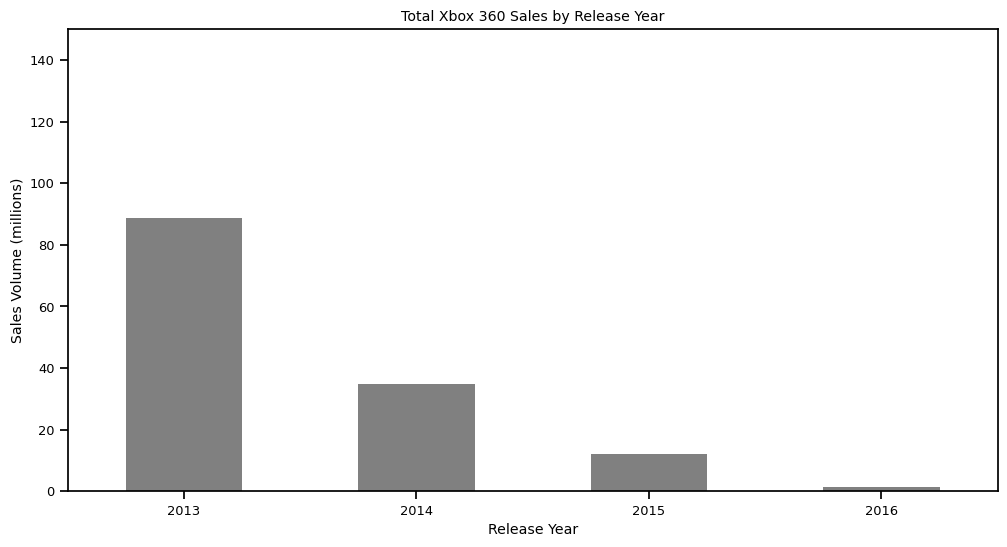

In [24]:
# Distribution of Total Sales by Release Year (focusing on top platforms by sales)

top_5_sales = selected_df.sort_values(by='total_sales_M', ascending=False).head() #quick view into top games by total_sales_M
#display(top_5_sales) 

top_platforms = ['PS3', 'X360', 'PS4', '3DS', 'XOne'] #platform filters 
top_5_df = selected_df.query("platform in @top_platforms")[['name','release_year','platform','total_sales_M']] #filtering on then top 5 platforms (by total_sales_M)
#top_5_df = ice_df[ice_df.platform.isin(top_platforms)]
#display(top_5_df)

# Creating instances for each platform, focusing on the year 2008-2016 as this time horizon has more rapid 'console upgrades'
df_ps3 = selected_df.query("'PS3' in platform")[['release_year','total_sales_M']]
df_x360 = selected_df.query("'X360' in platform")[['release_year','total_sales_M']]
df_ps4 = selected_df.query("'PS4' in platform")[['release_year','total_sales_M']]
df_3ds = selected_df.query("'3DS' in platform")[['release_year','total_sales_M']]
df_xone = selected_df.query("'XOne' in platform")[['release_year','total_sales_M']]

# Grouping said instances and creating plots for each for comparison
ps3_subset = df_ps3.groupby(['release_year']).agg(['sum']).reset_index()
x360_subset = df_x360.groupby(['release_year']).agg(['sum']).reset_index()
ps4_subset = df_ps4.groupby(['release_year']).agg(['sum']).reset_index()
n3ds_subset = df_3ds.groupby(['release_year']).agg(['sum']).reset_index()
xone_subset = df_xone.groupby(['release_year']).agg(['sum']).reset_index()

# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

ps4_subset.plot(
    x='release_year',
    y='total_sales_M',
    xlabel='Release Year',
    ylabel='Sales Volume (millions)',
    title='Total PS4 Sales by Release Year',
    figsize=[12, 6],
    kind='bar',
    color='red',
    rot=0,
    legend=False,
    ylim=(0,150)
)

ps3_subset.plot(
    x='release_year',
    y='total_sales_M',
    xlabel='Release Year',
    ylabel='Sales Volume (millions)',
    title='Total PS3 Sales by Release Year',
    figsize=[12, 6],
    kind='bar',
    color='blue',
    rot=0,
    legend=False,
    ylim=(0,150)
)

xone_subset.plot(
    x='release_year',
    y='total_sales_M',
    xlabel='Release Year',
    ylabel='Sales Volume (millions)',
    title='Total Xbox One Sales by Release Year',
    figsize=[12, 6],
    kind='bar',
    color='cyan',
    rot=0,
    legend=False,
    ylim=(0,150)
)

n3ds_subset.plot(
    x='release_year',
    y='total_sales_M',
    xlabel='Release Year',
    ylabel='Sales Volume (millions)',
    title='Total 3DS Sales by Release Year',
    figsize=[12, 6],
    kind='bar',
    color='orange',
    rot=0,
    legend=False,
    ylim=(0,150)
)


x360_subset.plot(
    x='release_year',
    y='total_sales_M',
    xlabel='Release Year',
    ylabel='Sales Volume (millions)',
    title='Total Xbox 360 Sales by Release Year',
    figsize=[12, 6],
    kind='bar',
    color='gray',
    rot=0,
    legend=False,
    ylim=(0,150)
)

#plt.tight_layout()
plt.show()


**`Sales variability by Year`**

Console lifespan is on average 5 years.
    
> - Comparing both Playstation systems and their total sales vs release year, we can distinctly see an inverse correlation between the two consoles. PS3 sales near the 120M mark in 2013 with a steep decline the following year (50M) ss the PS4 is introduced. 2014 is the start where we see the large dip on the PS3 sales as, again, the PS4 gains popularity and the exclusively PS4 game library ramps up (PS3 sales nearing zero in 2016)
    
> - Moving over to Nintendo based platforms (3DS), we can see a similar story of sales decline. We have the halving of total sales in 2015 as anticipation for the newest system, the Switch, increases

> - When it comes to the Xbox 360 (released in 2005), we see total sales mimic the sales of the PS3 -- a steep decline starting in 2014 as a new and upgraded console is introduced (Xbox One; 2013). Xbox One sales don't quite ramp up compared to the PS4 but the trajectory is very similar
    
Overall, once a new and upgraded console is introduced by these developers a large dip begins to take place for legacy consoles. The average time for near 0 sales is ~3 years from the new console introduction. 
    
**Selected time horizon:**

While looking at the underlying data, we've come to select a specific time horizon for further analysis (2013-2016). With the alternative time horizon being from 2010-2016 (this period has more frequent console 'replacements' as new and upgraded consoles start being developed). 
    
> - Following analysis will filter out data prior to the 2013 to build a prognosis for 2017

In [25]:
# Filtering data based on selected time horizon
# Re-analyze total sales and determine the platforms that lead in sales overall, pick out the potentiall profitable platforms

filtered_df = selected_df[(selected_df['release_year'] >= 2000) & (selected_df['total_sales_M'] > 0)] #filter for release year and a further filter for total sales above 0
display(filtered_df)
#display(filtered_df['release_year'].unique()) #checks 

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales_M
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


In [26]:
# Leveraging filtered DF to find platforms that lead in sales

px_df = px.data.tips()

# Sales lead by total (sum)
print('Sales Leader by Total:')
filtered_df_grouping = filtered_df.groupby('platform')['total_sales_M'].sum()
new_df = filtered_df_grouping.sort_values(ascending=False).reset_index()
display(new_df)

total_box = px.box(new_df, x='platform', y='total_sales_M', color='platform',
             title='Sales Leaders by Platform<br><sup>Ladder</sup>', labels={'platform':'Platform', 'total_sales_M':'Total Sales (millions)'}, width=1100, height=600)
total_box.show()

# Sales lead by average (mean)
print('Sales Leader by Average:')
avg_filter_df = filtered_df.groupby('platform')['total_sales_M'].mean()
avg_df = avg_filter_df.sort_values(ascending=False).reset_index()
display(avg_df)

avg_box = px.box(avg_df, x='platform', y='total_sales_M', color='platform',
             title='Sales Leaders by Platform<br><sup>Ladder</sup>', labels={'platform':'Platform', 'total_sales_M':'Average Sales (millions)'}, width=1100, height=600)
avg_box.show()

filtered_platform_cols = ['na_sales','eu_sales','jp_sales','other_sales','total_sales_M']
filtered_df_sales = filtered_df.groupby('platform')[filtered_platform_cols].sum()
#display(filtered_df_sales)

# Closer look at the platforms with future sales potential
print('Platforms with future sales potential:')
platforms_with_potential = ['PS4', 'XOne']
potential_query = new_df.query("platform in @platforms_with_potential")
display(potential_query)


Sales Leader by Total:


/var/folders/wc/6x35sr293njgq8g1xgc9fzlm0000gn/T/ipykernel_4387/3055760793.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,platform,total_sales_M
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99
8,Wii,13.66
9,PSP,3.50


/opt/homebrew/lib/python3.11/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Sales Leader by Average:


/var/folders/wc/6x35sr293njgq8g1xgc9fzlm0000gn/T/ipykernel_4387/3055760793.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,platform,total_sales_M
0,PS4,0.801378
1,X360,0.735484
2,XOne,0.645020
3,Wii,0.593913
4,WiiU,0.562000
5,PS3,0.525884
6,3DS,0.472772
7,PC,0.208624
8,DS,0.192500
9,PSV,0.092151


/opt/homebrew/lib/python3.11/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Platforms with future sales potential:


/var/folders/wc/6x35sr293njgq8g1xgc9fzlm0000gn/T/ipykernel_4387/3055760793.py:26: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,platform,total_sales_M
0,PS4,314.14
2,XOne,159.32


**`Sales leaders by Platform`**

Our table above shows us that PS4, PS3 and Xbox One lead the race in total sales.
    
> - Profitable platforms to be selected in this analysis should be the newer consoles like the PS4 and the Xbox One. They are the consoles taking over towards the end of this dataset's time horizon and therefore will have the most propensity for future, potential sales
    
> - We aren't focusing on some of the top platforms given their steadily decline in total sales in recent years. The aim is to focus on newer consoles that bring new games to consumers and can be priced at a higher range

In [27]:
filtered_df['platform'] = filtered_df.platform.astype(str)
# filtered_df= filtered_df[filtered_df.platform != '2600']
# display(filtered_df.platform != 2600)

#### newer box plots
px_df = px.data.tips()
fig = px.box(filtered_df, x='platform', y='total_sales_M', color='platform',
             title='Total Sales by Platform<br><sup>Boxplot analysis</sup>',
             labels={'platform':'Platform', 'total_sales_M':'Total Sales (millions)'}, width=1100, height=600)
fig.update_layout(showlegend=False)
fig.update_yaxes(range = [0,2.5])
fig.show()

selected_platform = ['PS4', 'XOne']
pot_query = filtered_df.query("platform in @selected_platform")
pot = px.box(pot_query, x='platform',y='total_sales_M',color='platform',
             title='Total Sales by Selected Platform<br><sup>Boxplot analysis</sup>',
             labels={'platform':'Platform', 'total_sales_M':'Total Sales (millions)'}, width=1100, height=600)
pot.update_yaxes(range = [0,2])
pot.update_layout(showlegend=False)
pot.show()

#### average box plot
avg = px.box(avg_df, x='platform', y='total_sales_M', color='platform',
             title='Average Sales by Platform<br><sup>Ladder</sup>',
             labels={'platform':'Platform', 'total_sales_M':'Average Sales (millions)'}, width=1100, height=600)

avg.show()


/opt/homebrew/lib/python3.11/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**`Global Sales by Platform`**

At a glance
    
> - When looking at global sales across platforms, we see variation in total sales when comparing the Playstation and Xbox consoles. The PS4 by far exceed overall sales compared to all other platforms by as much as 2x (vs the PS3/Xbox One/X360 *and* the 3DS even) 
    
> - If we filter down the platforms to those with future earnings potential, the PS4 and Xbox One, we see that the PS4 has twice as many total sales compared to the Xbox One. This is most likely due to a more limited Xbox One game library (~150 more games in the PS4 library during this time horizon) and/or heavier advertising overall from Playstation

Averages
   
> - Converting this dataset into averages (sales), we continue to see the PS4 at the top bringing in higher average sales *but* a shift afterwards, the Microsoft consoles overtake positions 1 & 2 while we see the PS3 move all the way down to slot #6 (from #2). The Wii and Wii U come in at #4 & #5 respectively where they, initially, were #9 & #6 on a total absolute sales basis

> - **For the PS4**, the higher average sales could be due to: 1) a newer console where developers/manufacturers can 'reset' the market (charge an extra $10-20 dollar per game due to 'enhancements' <-- *this is what usually happens* and 2) game library limit (newer console release) which hikes up game demand and lets developers keep original pricing for a longer period of time (no need for sales)

In [28]:
# Looking into critic scores and how they affect sales of a specific platform (PS4)
# Build a scatterplot to calculate correlation between reviews and sales w/Conclusions
# Leveraging the 2013-2016 time horizon (filtered_df)

specific_platform = ['PS4'] #choosing a specific platform
ps4_only = filtered_df.query("platform in @specific_platform") #filtering the DF
ps4_scores = ps4_only[['name','critic_score','total_sales_M']] #slicing the DF
ps4_sorted = ps4_scores.sort_values(by='critic_score',ascending=False) #sorting based on critic_score
display(ps4_sorted) #check
# display(ps4_sorted.corr(method ='pearson')) #corr method

ps4_fig = px.scatter(ps4_sorted, x='total_sales_M', y='critic_score', color='critic_score',
                    title='Professional Review to Total Sales - PS4<br><sup>Correlation analysis</sup>', labels={'critic_score':'Professional Review Score', 'total_sales_M':'Total Sales (millions)'}, width=1100, height=600)
ps4_fig.update_coloraxes(colorbar_title_text='Scale', colorbar_tickangle=-0, colorbar_bordercolor='lightgray', colorbar_borderwidth=1)
ps4_fig.update_layout(xaxis={"dtick":1})
ps4_fig.show()

# Looking at the same analysis but on another lense, this time a different platform (PS3)
# To help us understand the data under a wider scope and similar platform (PS4 replaces the PS3)

specific_platform = ['PS3'] #choosing a specific platform
ps3_only = filtered_df.query("platform in @specific_platform") #filtering the DF
ps3_scores = ps3_only[['name','critic_score','total_sales_M']] #slicing the DF
ps3_sorted = ps3_scores.sort_values(by='critic_score',ascending=False) #sorting based on critic_score
display(ps3_sorted) #check
# display(ps3_sorted.corr(method ='pearson')) #corr method

ps3_fig = px.scatter(ps3_sorted, x='total_sales_M', y='critic_score', color='critic_score',
                    title='Professional Review to Total Sales - PS3<br><sup>Correlation analysis</sup>', labels={'critic_score':'Professional Review Score', 'total_sales_M':'Total Sales (millions)'}, width=1100, height=600)
ps3_fig.update_coloraxes(colorbar_title_text='Scale', colorbar_tickangle=-0, colorbar_bordercolor='lightgray', colorbar_borderwidth=1)
ps3_fig.update_layout(xaxis={"dtick":1})
ps3_fig.show()

,name,critic_score,total_sales_M
42,Grand Theft Auto V,97.0,12.62
171,Uncharted 4: A Thief's End,93.0,5.39
390,Metal Gear Solid V: The Phantom Pain,93.0,3.42
623,Bloodborne,92.0,2.48
303,The Witcher 3: Wild Hunt,92.0,3.97
...,...,...,...
16398,Chaos;Child,NaN,0.01
16428,R.B.I. Baseball 2016,NaN,0.01
16496,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,NaN,0.01
16503,Shin Hayarigami 2,NaN,0.01


,name,critic_score,total_sales_M
16,Grand Theft Auto V,97.0,21.05
149,The Last of Us,95.0,5.86
1060,BioShock Infinite,94.0,1.69
4771,Metal Gear Solid: The Legacy Collection,93.0,0.41
1550,Dark Souls II,91.0,1.28
...,...,...,...
16558,Naruto Shippuden: Ultimate Ninja Storm Collection,NaN,0.01
16638,Tour de France 2014,NaN,0.01
16674,Tsukigime Ranko's Longest Day,NaN,0.01
16691,Dynasty Warriors: Eiketsuden,NaN,0.01


In [29]:
# Looking into user scores and how they affect sales of a specific platform (PS4) (continued...)
# Build a scatterplot to calculate correlation between reviews and sales w/Conclusions
# Leveraging the 2013-2016 time horizon (filtered_df)

specific_platform = ['PS4'] #choosing a specific platform
ps4_only = filtered_df.query("platform in @specific_platform") #filtering the DF
ps4_scores = ps4_only[['name','user_score','total_sales_M']] #slicing the DF
ps4_sorted = ps4_scores.sort_values(by='user_score',ascending=False) #sorting based on critic_score
display(ps4_sorted) #check
# display(ps4_sorted.corr(method ='pearson')) #corr method

ps4_fig = px.scatter(ps4_sorted, x='total_sales_M', y='user_score', color='user_score',
                    title='User Review to Total Sales - PS4<br><sup>Correlation analysis</sup>', labels={'user_score':'User Review Score', 'total_sales_M':'Total Sales (millions)'}, width=1100, height=600)
ps4_fig.update_layout(xaxis={"dtick":1})
ps4_fig.update_coloraxes(colorbar_title_text='Scale', colorbar_tickangle=-0, colorbar_bordercolor='lightgray', colorbar_borderwidth=1)
ps4_fig.show()

# Looking at the same analysis but on another lense, this time a different platform (PS3)
# To help us understand the data under a wider scope and similar platform (PS4 replaces the PS3)

specific_platform = ['PS3'] #choosing a specific platform
ps3_only = filtered_df.query("platform in @specific_platform") #filtering the DF
ps3_scores = ps3_only[['name','user_score','total_sales_M']] #slicing the DF
ps3_sorted = ps3_scores.sort_values(by='user_score',ascending=False) #sorting based on critic_score
display(ps3_sorted) #check
# display(ps3_sorted.corr(method ='pearson')) #corr method

ps3_fig = px.scatter(ps3_sorted, x='total_sales_M', y='user_score', color='user_score',
                    title='User Review to Total Sales - PS3<br><sup>Correlation analysis</sup>', labels={'user_score':'User Review Score', 'total_sales_M':'Total Sales (millions)'}, width=1100, height=600)
ps3_fig.update_layout(xaxis={"dtick":1})
ps3_fig.update_coloraxes(colorbar_title_text='Scale', colorbar_tickangle=-0, colorbar_bordercolor='lightgray', colorbar_borderwidth=1)
ps3_fig.show()

,name,user_score,total_sales_M
303,The Witcher 3: Wild Hunt,9.2,3.97
1107,Dark Souls III,8.8,1.66
4676,Farming Simulator 17,8.7,0.42
5120,Rocket League,8.7,0.36
8886,The King of Fighters XIV,8.7,0.15
...,...,...,...
16398,Chaos;Child,NaN,0.01
16428,R.B.I. Baseball 2016,NaN,0.01
16496,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,NaN,0.01
16503,Shin Hayarigami 2,NaN,0.01


,name,user_score,total_sales_M
149,The Last of Us,9.1,5.86
4771,Metal Gear Solid: The Legacy Collection,9.0,0.41
8790,Tears to Tiara II: Heir of the Overlord,8.7,0.16
3473,Rayman Legends,8.7,0.58
6678,Hatsune Miku: Project Diva F 2nd,8.6,0.25
...,...,...,...
16558,Naruto Shippuden: Ultimate Ninja Storm Collection,NaN,0.01
16638,Tour de France 2014,NaN,0.01
16674,Tsukigime Ranko's Longest Day,NaN,0.01
16691,Dynasty Warriors: Eiketsuden,NaN,0.01


In [30]:
# Looking into user and critic scores and how they affect sales of a specific platform (PS4) (continued...)
# Comparing the sales of the same population of games in the cell above to those in other platforms (PS4 vs Xbox One)
# Leveraging the 2010-2016 time horizon (filtered_df)

specific_platform = ['XOne'] #choosing a specific platform
xone_only = filtered_df.query("platform in @specific_platform") #filtering the DF
xone_scores = xone_only[['name','critic_score','total_sales_M']] #slicing the DF
xone_sorted = xone_scores.sort_values(by='critic_score',ascending=False) #sorting based on critic_score
display(xone_sorted) #check
# display(xone_sorted.corr(method ='pearson')) #corr method

xone_fig = px.scatter(xone_sorted, x='total_sales_M', y='critic_score', color='critic_score',
                    title='Professional Review to Total Sales - Xbox One<br><sup>Correlation analysis</sup>', labels={'critic_score':'Professional Review Score', 'total_sales_M':'Total Sales (millions)'}, width=1100, height=600)
xone_fig.update_layout(xaxis={"dtick":1})
xone_fig.update_coloraxes(colorbar_title_text='Scale', colorbar_tickangle=-0, colorbar_bordercolor='lightgray', colorbar_borderwidth=1)
xone_fig.show()

,name,critic_score,total_sales_M
165,Grand Theft Auto V,97.0,5.47
2720,Metal Gear Solid V: The Phantom Pain,95.0,0.75
1499,The Witcher 3: Wild Hunt,91.0,1.30
1948,Overwatch,91.0,1.06
1904,Forza Horizon 3,91.0,1.08
...,...,...,...
16590,Hitman (2016),NaN,0.01
16595,Rabbids Invasion: The Interactive TV Show,NaN,0.01
16643,Rugby Challenge 3,NaN,0.01
16645,ZombiU,NaN,0.01


In [31]:
# Analyzing the general distribution of games by genre
# Search for the most profitable genres and what they tell you, generalize about the genres with high and low sales
# Leveraging the 2013-2016 time horizon (filtered_df)

filtered_df['genre'] = filtered_df.genre.astype(str)
# Summation
# All genres and their profitability from 2013 to 2016
profitable_genres = filtered_df.groupby('genre')['total_sales_M'].sum().reset_index() #most profitable genres across all regions
top_prof_genres = profitable_genres.sort_values(by='total_sales_M', ascending=False).head(12) #sorting the genres
display(top_prof_genres) #check

all_genres = px.box(filtered_df, x='genre', y='total_sales_M', color='genre',
             title='Total Video Game Sales by Genre (2013-2016)<br><sup>Boxplot analysis</sup>',
             labels={'genre':'Genre', 'total_sales_M':'Sales (millions)'}, width=1100, height=600)
all_genres.update_yaxes(range = [0,3.5])
all_genres.update_layout(showlegend=False)
all_genres.show()

top_3_genre = filtered_df.query("['Action','Shooter', 'Sports'] in genre")

top_genres = px.box(top_3_genre, x='genre', y='total_sales_M', color='genre',
             title='Total Video Game Sales by Top 3 Genres (2013-2016)<br><sup>Boxplot analysis</sup>',
             labels={'genre':'Genre', 'total_sales_M':'Sales (millions)'}, width=1100, height=600)
top_genres.update_yaxes(range = [0,3.5])
top_genres.update_layout(showlegend=False)
top_genres.show()

# Average
profitable_genres_avg = filtered_df.groupby('genre')['total_sales_M'].mean().reset_index() #most profitable genres across all regions
top_prof_genres_avg = profitable_genres_avg.sort_values(by='total_sales_M', ascending=False).head(12) #sorting the genres
top_prof_genres_avg = top_prof_genres_avg.rename(columns={'total_sales_M': 'avg_total_sales_M'})
#display(top_prof_genres_avg) #check

all_genres_avg = px.box(top_prof_genres_avg, x='genre', y='avg_total_sales_M', color='genre',
             title='Average Video Game Sales by Genre (2013-2016)<br><sup>Ladder</sup>',
             labels={'genre':'Genre', 'avg_total_sales_M':'Average Sales (millions)'}, width=1100, height=600)

all_genres_avg.show()

# Summation
# All genres and their profitability from 1980 to 2016
profitable_genres_full = ice_df.groupby('genre')['total_sales_M'].sum().reset_index() #most profitable genres across all regions
top_prof_genres_full = profitable_genres_full.sort_values(by='total_sales_M', ascending=False).head(12) #sorting the genres
#display(top_prof_genres_full) #check

all_genres_long = px.box(ice_df, x='genre', y='total_sales_M', color='genre',
             title='Total Video Game Sales by Genre (1980-2016)<br><sup>Boxplot analysis</sup>',
             labels={'genre':'Genre', 'total_sales_M':'Total Sales (millions)'},width=1100, height=600)
all_genres_long.update_layout(showlegend=False)
all_genres_long.update_yaxes(range = [0,2])
all_genres_long.show()

# Average
profitable_genres_full_avg = ice_df.groupby('genre')['total_sales_M'].mean().reset_index() #most profitable genres across all regions
top_prof_genres_full_avg = profitable_genres_full_avg.sort_values(by='total_sales_M', ascending=False).head(12) #sorting the genres
top_prof_genres_full_avg = top_prof_genres_full_avg.rename(columns={'total_sales_M': 'avg_total_sales_M'})
#display(top_prof_genres_full_avg) #check

,genre,total_sales_M
0,Action,321.87
8,Shooter,232.98
10,Sports,150.65
7,Role-Playing,145.89
3,Misc,62.82
4,Platform,42.63
6,Racing,39.89
2,Fighting,35.31
1,Adventure,23.64
9,Simulation,21.76


/var/folders/wc/6x35sr293njgq8g1xgc9fzlm0000gn/T/ipykernel_4387/284971486.py:42: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/opt/homebrew/lib/python3.11/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/var/folders/wc/6x35sr293njgq8g1xgc9fzlm0000gn/T/ipykernel_4387/284971486.py:54: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**`Global Sales and Professional/User Reviews`**
    
Professional/Critic Review to Total Sales correlation
    
> - From our analysis of the PS4 platform, we can see that there is a ~30-40% positive correlation between Professional Reviews and Total Sales. There are outliers however, that have a high professional score and a high number of sales but, statistically, the majority of good reviews (for the sake of this analysis let's say it's 75+) 'float' in the $0-5M dollar range 
    
> - Comparing the PS4 sales to the Xbox one, we can see that the same story persists -- there is direct positive correlation of a critic's review to total sales as it helps 'push' game sales towards a higher total sales amount. ***The higher we get in the critic score path the more you see the sales figures increase***

User Review to Total Sales correlation
    
> - Now looking at User Scores, we see close to no correlation. The higher the user score doesn't necessarily mean higher sales, we have outliers with 'medium' to 'lower' user scores that achive good total sales (~$2M+)

Game distribution by Genre    

> - The distribution of sales by genre from a specific time horizon (2013-2016), shows us that the top 2 genres accumulate substantially more total sales compared to the rest (around 200M difference between spot #1 & #3). These genres (Action & Shooter) are also the most popular among the regions (bar plots in the following analysis). ***The Shooter genre has the largest potential overall for accumualting sales based on the box plots***
    
> - Expanding the time horizon yields similar results, the Action genre accumulates the most sales overall (around 700M difference between spot #1 & #3) but we see a slight shift in the order with the Sports genre taking the #2 spot instead of the Shooter genre. This tells us that over the last few years, the Shooter genre has become more popular (see Call of Duty, Halo, Gears of War, Battlefield)

> - Amending from total sales to average sales does show something interesting, while the Action genre accrues the largest overall total sales, it's nowhere near profitable (on average) compared to the Shooter or Sports genre. This shows how consumers likely pay a premium for both of those genres (*culprit possibly being microtransactions*)
    
</div>

***
# Per Region
***

In [32]:
# Top platforms per Region (sales based)
# Further describe variations once we have visibility on all regions 

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


# Top Platforms - North America
top_na = filtered_df.groupby('platform')['na_sales'].sum().reset_index()
top_na_sorted = top_na.sort_values(by='na_sales',ascending=False).head()
#display(top_na_sorted)

na_platforms = px.bar(top_na_sorted, x='platform', y='na_sales',range_y=(0,150),title='Top Platform by Sales<br><sup>North America</sup>',
                     color='platform',labels={'na_sales':'Sales', 'platform':'Platform'}, width=1100, height=600)
na_platforms.update_layout(showlegend=False)
na_platforms.show()

# Top Platforms - Europe
top_eu = filtered_df.groupby('platform')['eu_sales'].sum().reset_index()
top_eu_sorted = top_eu.sort_values(by='eu_sales',ascending=False).head()
#display(top_eu_sorted)

eu_platforms = px.bar(top_eu_sorted, x='platform', y='eu_sales',range_y=(0,150),title='Top Platform by Sales<br><sup>Europe</sup>',
                     color='platform',labels={'eu_sales':'Sales', 'platform':'Platform'}, width=1100, height=600)
eu_platforms.update_layout(showlegend=False)
eu_platforms.show()


# Top Platforms - Japan
top_jp = filtered_df.groupby('platform')['jp_sales'].sum().reset_index()
top_jp_sorted = top_jp.sort_values(by='jp_sales',ascending=False).head()
#display(top_jp_sorted)

jp_platforms = px.bar(top_jp_sorted, x='platform', y='jp_sales',range_y=(0,150),title='Top Platform by Sales<br><sup>Japan</sup>',
                     color='platform',labels={'jp_sales':'Sales', 'platform':'Platform'}, width=1100, height=600)
jp_platforms.update_layout(showlegend=False)
jp_platforms.show()

# Top Platforms - Other
top_other = filtered_df.groupby('platform')['other_sales'].sum().reset_index()
top_other_sorted = top_other.sort_values(by='other_sales',ascending=False).head()
#display(top_other_sorted)

other_platforms = px.bar(top_other_sorted, x='platform', y='other_sales', range_y=(0,150),title='Top Platform by Sales<br><sup>Other Regions</sup>',
                     color='platform',labels={'other_sales':'Sales', 'platform':'Platform'}, width=1100, height=600)
other_platforms.update_layout(showlegend=False)
other_platforms.show()

**`Top Platforms per Region`**

Our analysis above shows each region's top 5 platforms derived from it's regional sales. Time horizon is filtered (starts at 2013 like previous analysis).
    
> - When normalizing the Y scale, we can see the magnitude of EU sales in contrast to the other two regions, making a strong case about that region's digital consumering in recent years. The most popular platforms in the EU region largely match those in the NA region with a slight adjustment in order from #2 to #4
    
> - PS4 takes the cake when it comes to overall sales since 2013, especially in EU but Xbox One sales are not that far back which take the second seat when looking at top NA platform sales. The gap between the PS4 and Xbox One (both the newest platforms) is much more pronounced in Europe as there is almost a **100M difference in sales between the platforms (compared to only a ~$15M delta in North America)**
    
> - In Japan, home of the Playstation interestingly enough, handheld devices trickle into the top platforms of the region. We have the Nintendo 3DS, PS Vita and the Wii U taking decent market share compared to regular consoles. This informs us that during this time horizon, Japanese people 1) weren't consuming as many video games as the other regions and 2) they had a preference of handheld consoles as opposed to regular, 'home' consoles

> - In other parts of the world, both Playstation and Micosoft have a larger footprint compared to handheld consoles

In [33]:
# Top genres per Region (sales based)
# Further describe variations once we have visibility on all regions 

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


# Top Genres - North America
top_na_genre = filtered_df.groupby('genre')['na_sales'].sum().reset_index()
top_na_sorted_genre = top_na_genre.sort_values(by='na_sales',ascending=False).head()
#display(top_na_sorted)

top_na_sorted_genre = px.bar(top_na_sorted_genre, x='genre', y='na_sales', range_y=(0,150),title='Top Genre by Sales<br><sup>North America</sup>',
                     color='genre',labels={'na_sales':'Sales (in millions)', 'genre':'Genre'}, width=1100, height=600)
top_na_sorted_genre.update_layout(showlegend=False)
top_na_sorted_genre.show()

# Top Genres - Europe
top_eu_genre = filtered_df.groupby('genre')['eu_sales'].sum().reset_index()
top_eu_sorted_genre = top_eu_genre.sort_values(by='eu_sales',ascending=False).head()
#display(top_eu_sorted)

top_eu_sorted_genre = px.bar(top_eu_sorted_genre, x='genre', y='eu_sales', range_y=(0,150),title='Top Genre by Sales<br><sup>Europe</sup>',
                     color='genre',labels={'eu_sales':'Sales (in millions)', 'genre':'Genre'}, width=1100, height=600)
top_eu_sorted_genre.update_layout(showlegend=False)
top_eu_sorted_genre.show()

# Top Genres - Japan
top_jp_genre = filtered_df.groupby('genre')['jp_sales'].sum().reset_index()
top_jp_sorted_genre = top_jp_genre.sort_values(by='jp_sales',ascending=False).head()
#display(top_jp_sorted)

top_jp_sorted_genre = px.bar(top_jp_sorted_genre, x='genre', y='jp_sales', range_y=(0,150),title='Top Genre by Sales<br><sup>Japan</sup>',
                     color='genre',labels={'jp_sales':'Sales (in millions)', 'genre':'Genre'}, width=1100, height=600)
top_jp_sorted_genre.update_layout(showlegend=False)
top_jp_sorted_genre.show()

# Top Genres - Other
top_other_genre = filtered_df.groupby('genre')['other_sales'].sum().reset_index()
top_other_sorted_genre = top_other_genre.sort_values(by='other_sales',ascending=False).head()
#display(top_other_sorted)

top_other_sorted_genre = px.bar(top_other_sorted_genre, x='genre', y='other_sales', range_y=(0,150),title='Top Genre by Sales<br><sup>Other Regions</sup>',
                     color='genre',labels={'other_sales':'Sales (in millions)', 'genre':'Genre'}, width=1100, height=600)
top_other_sorted_genre.update_layout(showlegend=False)
top_other_sorted_genre.show()

**`Top Genres per Region`**

Similar to our platform analysis, our tables/charts show each region's top 5 genres derived from the respective regional sales. Time horizon is filtered (starts at 2013 like previous analysis).
    
> - When normalizing the Y scale, we can again see a larger magnitude of NA sales in contrast to the other regions. The most popular genres in NA region match those in the EU regions except for the last one where we have the Racing vs Mic genres
    
> - Through all the filtered datasets, and in an aggregated basis, the Action genre takes the largest share of sales since 2013, this is a consistent theme through the NA/EU/Other regions and is not far behind the number 1 genre in JP
    
> - Japanese consumers continue to differ in taste, they prioritize Role-Playing games (which makes sense considering the recurring themes of Japanese anime) and have some interest in the Fighting genre which isn't readily seen in the other regions

> - In other parts of the world, top genre sales continue to follow the NA regional model: a larger share of Action, Shooter and Sports genres

In [34]:
# Top ESRB per Region (sales based)
# Further describe variations once we have visibility on all regions 

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


# Top Ratings - North America
#top_na_rating = filtered_df.groupby('rating')['na_sales'].sum().reset_index()
#top_na_sorted_rating = top_na_rating.sort_values(by='na_sales',ascending=False).head()
#display(top_na_sorted_rating)

#top_na_sorted_rating = px.bar(top_na_sorted_rating, x='rating', y='na_sales', range_y=(0,200),title='Top Ratings by Sales - North America',
#                     color='rating',labels={'na_sales':'Game Sales (millions)', 'rating':'Rating'})
#top_na_sorted_rating.show()

top_na_sorted_rating = px.pie(filtered_df, values='na_sales', names='rating', color_discrete_sequence=px.colors.sequential.RdBu,
                               title='Top Video Game Ratings by Sales<br><sup>North America</sup>', width=1100, height=600 )
top_na_sorted_rating.show()

# Top Ratings - Europe
#top_eu_rating = filtered_df.groupby('rating')['eu_sales'].sum().reset_index()
#top_eu_sorted_rating = top_eu_rating.sort_values(by='eu_sales',ascending=False).head()
#display(top_eu_sorted_rating)

#top_eu_sorted_rating = px.bar(top_eu_sorted_rating, x='rating', y='eu_sales', range_y=(0,200),title='Top Ratings by Sales - Europe',
#                     color='rating',labels={'eu_sales':'Game Sales (millions)', 'rating':'Rating'})
#top_eu_sorted_rating.show()

top_eu_sorted_rating = px.pie(filtered_df, values='eu_sales', names='rating', color_discrete_sequence=px.colors.sequential.RdBu,
                               title='Top Video Game Ratings by Sales<br><sup>Europe</sup>', width=1100, height=600 )
top_eu_sorted_rating.show()

# Top Ratings - Japan
#top_jp_rating = filtered_df.groupby('rating')['jp_sales'].sum().reset_index()
#top_jp_sorted_rating = top_jp_rating.sort_values(by='jp_sales',ascending=False).head()
#display(top_jp_sorted_rating)

#top_jp_sorted_rating = px.bar(top_jp_sorted_rating, x='rating', y='jp_sales', range_y=(0,200),title='Top Ratings by Sales - Japan',
#                     color='rating',labels={'jp_sales':'Game Sales (millions)', 'rating':'Rating'})
#top_jp_sorted_rating.show()

top_jp_sorted_rating = px.pie(filtered_df, values='jp_sales', names='rating', color_discrete_sequence=px.colors.sequential.RdBu,
                               title='Top Video Game Ratings by Sales<br><sup>Japan</sup>', width=1100, height=600)
top_jp_sorted_rating.show()

# Top Ratings - Other
#top_other_rating = filtered_df.groupby('rating')['other_sales'].sum().reset_index()
#top_other_sorted_rating = top_other_rating.sort_values(by='other_sales',ascending=False).head()
#display(top_other_sorted_rating)

#top_other_sorted_rating = px.bar(top_other_sorted_rating, x='rating', y='other_sales', range_y=(0,200),title='Top Ratings by Sales - Other',
#                     color='rating',labels={'other_sales':'Game Sales (millions)', 'rating':'Rating'})
#top_other_sorted_rating.show()

top_other_sorted_rating = px.pie(filtered_df, values='other_sales', names='rating', color_discrete_sequence=px.colors.sequential.RdBu,
                               title='Top Video Game Ratings by Sales<br><sup>Other Regions</sup>', width=1100, height=600 )
top_other_sorted_rating.show()

**`Top Ratings per Region`**

From our data insights above, we can see similar stories to the 2 previous analyses -- NA and EU regions largely follow each other's sales preferences with the top 3 ratings designations (M,E & Unknown).
    
> - We see large shares of the Mature rating in both the NA and EU regions (~40%) which looks to be closely correlated to the Action genre. On the flip side, assigning an E rating to a game would broaden the consumers willing to purchase the game in a sense (if the consumers don't have a specific bias or genre they're looking for)
    
> - E ratings are prevalent in most regions but with much smaller sales volumes in JP (only 10% of sales). This could be due to less games in production in said markets and could also be skewed given Japan's number 1 assigned rating is the 'Unknown' category (we replaced the nulls with 'Unknown')
    
> - The Japanese region has the second largest 'Unknown' Ratings category right behind North America (85M vs 89M in sales respectively) but the largest share of its overall sales wallet at a 60% share of total sales. This could be due to 1) consumers being less focused on who the game is for, 2) the gaming community being much more older that they don't have a preference (which would therefore mean less game analysis and ratings designations) or 3) newer gaming consoles/game releases which have no designation as of today
    
> > - Another hypothesis would be that because the largest share of platforms in JP is for the 3DS handheld systems, the ratings websites were't as keen to create reviews/ratings given the popularity outside of JP wasn't there <-- *again, there are all assumptions based on this dataset*

> - We can conclude that Ratings do impact/affect sales in individual regions, especially in the NA/EU regions who have very similar tastes overall

***
# Hypothesis Testing
***

In [35]:
# Diving into hypothetical testing, comparing average user ratings of the Xbox One to the PC platforms
# We are hypothesizing that both average user ratings are the same (both from the same developer: Microsoft)

# Xbox One
# 1st query on platform, 2nd returning results that are no NAN from user_score and 3rd listing only the user_score column to use in hypothetical testin
sample_xone = filtered_df.query('platform == "XOne" and user_score.notna()')['user_score'] #querying those instances only for the Xbox one platform
#display(sample_xone) #check

# PC
# 1st query on platform, 2nd returning results that are no NAN from user_score and 3rd listing only the user_score column to use in hypothetical testin
sample_pc = filtered_df.query('platform == "PC" and user_score.notna()')['user_score'] #querying those instances only for the PC platform
#display(sample_pc) #check


# Hypothesis Testing
    # null = average user ratings are the same
    # alternative = average user ratings are not the same

#95 percent confident that this analysis is correct, alpha level euquals to: (1 – . 95) = 5%        
alpha = 0.05 #critical statistical significance
#if the p-value is less than alpha, we reject the hypothesis


results = st.ttest_ind(sample_xone, sample_pc, equal_var=False) #not expecting variances to be the same

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.14759594013430466
We can't reject the null hypothesis


In [36]:
# Diving into hypothetical testing, comparing average user ratings of the Action and Sports genres
# We are hypothesizing that average user ratings differ from Action and Sports genres

# Action
# 1st query on genre, 2nd returning results that are no NAN from user_score and 3rd listing only the user_score column to use in hypothetical testin
sample_action = filtered_df.query('genre == "Action" and user_score.notna()')['user_score'] #querying those instances only for the Xbox one platform
#display(sample_action) #check

# Sports
# 1st query on genre, 2nd returning results that are no NAN from user_score and 3rd listing only the user_score column to use in hypothetical testin
sample_sports = filtered_df.query('genre == "Sports" and user_score.notna()')['user_score'] #querying those instances only for the Xbox one platform
#display(sample_sports) #check
 
# Hypothesis Testing
    # null = average user ratings are the different
    # alternative = average user ratings are the same

#80 percent confident, alpha level euquals to: (1 – . 80) = 20%    
alpha = 0.2 #critical statistical significance 
#if the p-value is less than alpha, we reject the hypothesis


results = st.ttest_ind(sample_action, sample_sports, equal_var=False) #not expecting variances to be the same

print('80% confidence') # test 1 based on an 80% confidence level
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

print()    
alpha_2 = 0.01    
    
print('99% confidence') # test 2 based on a 90% confidence level
print('p-value: ', results.pvalue)

if (results.pvalue < alpha_2):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
    
print()    
alpha_3 = 0.005    
    
print('99.5% confidence') # final test based on a 95% confidence level (common/benchmark)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha_3):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

80% confidence
p-value:  1.4460039700704315e-20
We reject the null hypothesis

99% confidence
p-value:  1.4460039700704315e-20
We reject the null hypothesis

99.5% confidence
p-value:  1.4460039700704315e-20
We reject the null hypothesis


**`Hypothesis Formulation`**

Xbox vs PC Platforms (*alpha set based on confidence level*)
    
> - Applying the method *'scipy.stats.ttest_ind(array1, array2, equal_var)'* to test the **null hypothesis** that the user score means of both populations (Xbox One vs PC) **are the same**
    
> - The data provides **insufficient evidence**, given the significance level we selected, to **reject the null hypothesis**. Based off of this, we can make the assumption that *Average User Ratings are the same* across the Xbox One to PC (same developer which would make sense)
    
    
Action vs Sports genres (*alpha set based on confidence level; level tested w/varying degrees*)

> - Applying the method *'scipy.stats.ttest_ind(array1, array2, equal_var)'* to test the **null hypothesis** that the user score means of both populations (Action vs Sports) **are not equal**   
    
> - The results provide **sufficient evidence**, given the significance level we selected, to **reject the null hypothesis** therefore landing on the alternative hypothesis that *Average User Ratings are practically the same* (given alpha) across the Action and Sports genres

    
Other
    
> - *Would have been interesting to test hypothesis on the equality of means of paired samples. For instance: ratings between games as new consoles are introduced and those games are ported into the new console or there is an upgraded game version for the newer console (usually only updates are graphics)* <-- ***scipy.stats.ttest_rel() would have been the choice in this instance***

> - *Assuming there would be some statistical significance if the **'tbd'** values of user_scores would be populated. Unsure if it would sway and/or move the story overall but worth calling it out*


# General Conclusion

Summary

There is significant game release variability by year due to time horizon and the increasing popularity of gaming systems/consoles: 

> - In an all empompassing view of game releases, the inntroduction of the world wide web in the early 90s brings forth new advances in the gaming market which supplies consumers with newer/enhanced consoles

> - Gaming consoles become a commonality within households come the early 2010s as console prices decrease (more competition, newer/cheaper tech advances and easier advertising methods as consumers become more interconnected than ever)

Sales by Year/Platform show us a recurring theme in the market:
> - Average console life span (sales not hardware) is ~5 years with new and enhanced consoles being released shortly thereafter

> - While 'replacement' consoles are introduced in the market and take a chunk of of older console sales, sales for these newer consoles take a longer period of time to ramp up as developers race to create new games (console releases usually only exhibit a few exclusive game releases to go along with it)

> - Legacy platforms take about ~3 years to see sales greatly reduced (as game library on the newer consoles is expanded/established)

Game Sales by Region/Platform/Genres show us the popularity of each console and the consumer preferences:

> - The NA and EU region sales platforms and genres show us some similarities, the only difference is the amount of overall sales from the NA region as the top 5 platforms have ~$50m more aggregate sales compared to Europe (assuming there is an easier or less strict route for game advertising in NA). Both region's sales weigh heavily towards Action, Shooter and Sports genres

> - Preferences in JP vary to other regions, they prefer (again, based on sales) handheld devices along with different types of genres (Role-Playing being their top genre choice)

Game Sales and Reviews:

> - There's significant correlation to overall professional ratings and sales, the better the review the higher probability that the game will achieve more sales. While this is mostly true and a decent amount of game sales 'live' in the same sales cuadrant, there are some outliers where sales more than double if it's a newer, more anticipated game (see GTA V w/in game sales or what they call 'micro transactions') and has great ratings to boot

> - Looking at user reviews, we then see no significant correlation (near zero). A higher score rating does not necassarily mean higher sales, there's plenty of variability between user ratings and sales -- we could have a higher user rated game gross less sales than a mid-to-lower rated game in some instances

Top Platforms/Genres & Ratings per Region

> - The PS4 takes the crown in overall sales in both the NA & EU regions with the Xbox One not too far behind (especially in North America) <-- US is home to the Xbox (Microsoft)

> - While JP is the home of Playstation, the 3DS is the leader in sales signaling a difference in consumer preference, handheld consoles vs 'stay at home' consoles

> - The Action genre is the highest grossing genre across NA and EU and not far behind number 1 in JP while other parts of the world follow NA & EU model: a larger share of Action, Shooter and Sports

> - The most common ESRB rating across the regions is M (Mature), this is shown to be closely related to the Action and Shooter genres which collect the most sales

> - JP has the largest volume of 'Unknown' ratings (as a percentage of total sales), which could mean a slew of things but the assumption here is that there perhaps is less game analysis and/or ratings designations to games since it's a more mature (or older) community overall which isn't influenced as much by a game's rating (compared to the other regions)

> - Overall, professional ratings impact/affect sales in individual regions, especially in the NA/EU regions who have very similar tastes overall

2017 Game Advertising Campaign

The campaign should focus on the following platforms: Xbox One and the PS4. 
> Advertising dollar should be split the following way, 1) a larger focus on the PS4 and Xbox One in both North America and Europe (Action/Shooter/Sports), ***specifically for Shooter and Sports genres as the world of micro-transactions expands (see Call of Duty/Madden/FIFA)*** and 2) a concentration of funds in advertising the upcoming Nintendo Switch along with the PS4 in Japan (Role-Playing/Action). These will pave the way to the next few years of game sales before a new/enhanced is introduced into the market (2014-2016 being the transition period to open up the game library/sales for these newer consoles).
